**1. Importing Libraries**

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid', palette='colorblind')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

**2. Importing and Showcasing Data: Global Data on Sustainable Energy**

**2.1 Read csv file**

In [35]:
from google.colab import files
uploaded = files.upload()

Saving global-data-on-sustainable-energy.csv to global-data-on-sustainable-energy.csv


In [36]:
df= pd.read_csv('global-data-on-sustainable-energy (1).csv')

**Data Dictionary**

In [37]:
# Create a data dictionary
df_dictionary = {
    'Entity': {
        'Data Type': 'object',
        'Description': 'The name of the country or region for which the data is reported.',
    },
    'Year': {
        'Data Type': 'int',
        'Description': 'The year for which the data is reported, ranging from 2000 to 2020.',
    },
    'Access to electricity (% of population)': {
        'Data Type': 'float',
        'Description': 'The percentage of population with access to electricity.',
    },
    'Access to clean fuels for cooking (% of population)': {
        'Data Type': 'float',
        'Description': 'The percentage of the population primarily relying on clean fuels.',
    },
    'Renewable-electricity-generating-capacity-per-capita': {
        'Data Type': 'float',
        'Description': 'Installed Renewable energy capacity per person.',
    },
    'Financial flows to developing countries (US $)': {
        'Data Type': 'float',
        'Description': 'Aid and assistance from developed countries for clean energy projects.',
    },
    'Renewable energy share in total final energy consumption (%)': {
        'Data Type': 'float',
        'Description': 'Percentage of Renewable energy in final energy consumption.',
    },
    'Electricity from fossil fuels (TWh)': {
        'Data Type': 'float',
        'Description': 'Electricity generated from fossil fuels (coal, oil, gas) in terawatt-hours.',
    },
    'Electricity from nuclear (TWh)': {
        'Data Type': 'float',
        'Description': 'Electricity generated from nuclear power in terawatt-hours.',
    },
    'Electricity from renewables (TWh)': {
        'Data Type': 'float',
        'Description': 'Electricity generated from renewable sources (hydro, solar, wind, etc.) in terawatt-hours.',
    },
    'Low-carbon electricity (% electricity)': {
        'Data Type': 'float',
        'Description': 'Percentage of electricity from low-carbon sources (nuclear and renewables).',
    },
    'Primary energy consumption per capita (kWh/person)': {
        'Data Type': 'float',
        'Description': 'Energy consumption per person in kilowatt-hours.',
    },
    'Energy intensity level of primary energy (MJ/$2011 PPP GDP)': {
        'Data Type': 'float',
        'Description': 'Energy use per unit of GDP at purchasing power parity.',
    },
    'Value_co2_emissions (metric tons per capita)': {
        'Data Type': 'float',
        'Description': 'Carbon dioxide emissions per person in metric tons.',
    },
    'Renewables (% equivalent primary energy)': {
        'Data Type': 'float',
        'Description': 'Equivalent primary energy that is derived from renewable sources.',
    },
    'GDP growth (annual %)': {
        'Data Type': 'float',
        'Description': 'Annual GDP growth rate based on constant local currency.',
    },
    'GDP per capita': {
        'Data Type': 'float',
        'Description': 'Gross domestic product per person.',
    },
    'Density (P/Km2)': {
        'Data Type': 'object',
        'Description': 'Population density in persons per square kilometer.',
    },
    'Land Area (Km2)': {
        'Data Type': 'float',
        'Description': 'Total land area in square kilometers.',
    },
    'Latitude': {
        'Data Type': 'float',
        'Description': 'Latitude of the country in decimal degrees.',
    },
    'Longitude': {
        'Data Type': 'float',
        'Description': 'Longitude of the country in decimal degrees.'
    }
}

In [38]:
df_dictionary

{'Entity': {'Data Type': 'object',
  'Description': 'The name of the country or region for which the data is reported.'},
 'Year': {'Data Type': 'int',
  'Description': 'The year for which the data is reported, ranging from 2000 to 2020.'},
 'Access to electricity (% of population)': {'Data Type': 'float',
  'Description': 'The percentage of population with access to electricity.'},
 'Access to clean fuels for cooking (% of population)': {'Data Type': 'float',
  'Description': 'The percentage of the population primarily relying on clean fuels.'},
 'Renewable-electricity-generating-capacity-per-capita': {'Data Type': 'float',
  'Description': 'Installed Renewable energy capacity per person.'},
 'Financial flows to developing countries (US $)': {'Data Type': 'float',
  'Description': 'Aid and assistance from developed countries for clean energy projects.'},
 'Renewable energy share in total final energy consumption (%)': {'Data Type': 'float',
  'Description': 'Percentage of Renewable en

**2.2 Display the first fifteen rows of the dataset**


In [39]:
df.head(15)

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.20,9.22,20000.0,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.20,8.86,130000.0,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.20,8.47,3950000.0,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.50,8.09,25970000.0,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.90,7.75,NaN,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953
5,Afghanistan,2005,25.390894,12.20,7.51,9830000.0,33.88,0.34,0.0,0.59,63.440857,252.06912,1.41,1549.999952,NaN,11.229715,242.031313,60,652230.0,33.93911,67.709953
6,Afghanistan,2006,30.718690,13.85,7.40,10620000.0,31.89,0.20,0.0,0.64,76.190475,304.42090,1.50,1759.999990,NaN,5.357403,263.733602,60,652230.0,33.93911,67.709953
7,Afghanistan,2007,36.051010,15.30,7.25,15750000.0,28.78,0.20,0.0,0.75,78.947370,354.27990,1.53,1769.999981,NaN,13.826320,359.693158,60,652230.0,33.93911,67.709953
8,Afghanistan,2008,42.400000,16.70,7.49,16170000.0,21.17,0.19,0.0,0.54,73.972600,607.83350,1.94,3559.999943,NaN,3.924984,364.663542,60,652230.0,33.93911,67.709953
9,Afghanistan,2009,46.740050,18.40,7.50,9960000.0,16.53,0.16,0.0,0.78,82.978720,975.04816,2.25,4880.000114,NaN,21.390528,437.268740,60,652230.0,33.93911,67.709953


**2.3 Column names of the dataset**

In [41]:
df.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')

**2.4 Number of Rows and Columns in the dataset**

In [42]:
df.shape

(3649, 21)

**2.5 Getting information on value types and mathematical insight**

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

**2.6 Descriptive Statistics of Numerical Columns**

In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,3649.0,2.010038e+03,6.054228e+00,2000.000000,2005.000000,2.010000e+03,2.015000e+03,2.020000e+03
Access to electricity (% of population),3639.0,7.893370e+01,3.027554e+01,1.252269,59.800890,9.836157e+01,1.000000e+02,1.000000e+02
Access to clean fuels for cooking,3480.0,6.325529e+01,3.904366e+01,0.000000,23.175000,8.315000e+01,1.000000e+02,1.000000e+02
Renewable-electricity-generating-capacity-per-capita,2718.0,1.131375e+02,2.441673e+02,0.000000,3.540000,3.291000e+01,1.122100e+02,3.060190e+03
Financial flows to developing countries (US $),1560.0,9.422400e+07,2.981544e+08,0.000000,260000.000000,5.665000e+06,5.534750e+07,5.202310e+09
Renewable energy share in the total final energy consumption (%),3455.0,3.263816e+01,2.989490e+01,0.000000,6.515000,2.330000e+01,5.524500e+01,9.604000e+01
Electricity from fossil fuels (TWh),3628.0,7.036500e+01,3.480519e+02,0.000000,0.290000,2.970000e+00,2.683750e+01,5.184130e+03
Electricity from nuclear (TWh),3523.0,1.345019e+01,7.300662e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,8.094100e+02
Electricity from renewables (TWh),3628.0,2.396801e+01,1.044311e+02,0.000000,0.040000,1.470000e+00,9.600000e+00,2.184940e+03
Low-carbon electricity (% electricity),3607.0,3.680118e+01,3.431488e+01,0.000000,2.877847,2.786507e+01,6.440379e+01,1.000000e+02


**2.7 Summary Statistics of 'Object' type columns in a dataframe**

In [45]:
df.describe(include = 'object').T

,count,unique,top,freq
Entity,3649,176,Afghanistan,21
Density\n(P/Km2),3648,124,25,147


**Data Cleaning**

**Rename the Column 'Entity' and 'Value_co2_emissions_kt_by_country'**

In [46]:
column_mapping = {
    'Entity': 'Country',
    'Value_co2_emissions_kt_by_country': 'CO2 emissions (kt)'
}
# Use the 'rename()' method to rename the columns
df.rename(columns=column_mapping, inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Country                                                           3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

**2.8 Unifying Values**

**2.8.1 Unifying Data Types**

In [48]:
df.nunique()


Country                                                              176
Year                                                                  21
Access to electricity (% of population)                             2040
Access to clean fuels for cooking                                    896
Renewable-electricity-generating-capacity-per-capita                2110
Financial flows to developing countries (US $)                      1017
Renewable energy share in the total final energy consumption (%)    2587
Electricity from fossil fuels (TWh)                                 1859
Electricity from nuclear (TWh)                                       547
Electricity from renewables (TWh)                                   1533
Low-carbon electricity (% electricity)                              2647
Primary energy consumption per capita (kWh/person)                  3628
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         1044
CO2 emissions (kt)                                 

In [49]:
df.dtypes

Country                                                              object
Year                                                                  int64
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable-electricity-generating-capacity-per-capita                float64
Financial flows to developing countries (US $)                      float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
CO2 emission

**2.9 Searching for null values & duplicate entries taking necessary actions**

In [50]:
df.isna().sum()

Country                                                                0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
CO2 emissions (kt)                                 

**Graphical representation of Columns having Null values**

<Axes: >

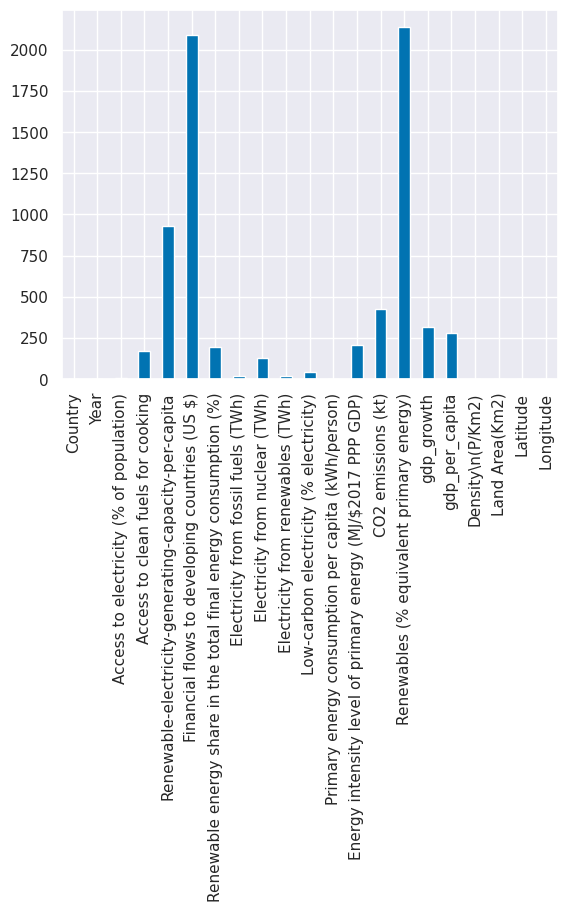

In [51]:
df.isna().sum().plot(kind = 'bar')

**2.9.1 Finding Duplicate Rows**

In [52]:
duplicate_rows = df[df.duplicated(keep='first')]

**2.9.2 Number of Duplicate Rows**

In [53]:
num_duplicates = duplicate_rows.shape[0]
num_duplicates

0

**2.9.3 Replace extra space with NaN**

In [54]:
df=df.replace(r'^\s+$', np.nan, regex=True)
df

Output hidden; open in https://colab.research.google.com to view.

**Fill all the Missing values with Mean**

In [94]:
df.fillna(df.mean(), inplace=True)
df

Output hidden; open in https://colab.research.google.com to view.

**Cast data type of 'Land' and 'Density' into Integer type**

In [82]:
df['Density\\n(P/Km2)'].apply(str).str.replace(',', '')

0                     60.0
1                     60.0
2                     60.0
3                     60.0
4                     60.0
5                     60.0
6                     60.0
7                     60.0
8                     60.0
9                     60.0
10                    60.0
11                    60.0
12                    60.0
13                    60.0
14                    60.0
15                    60.0
16                    60.0
17                    60.0
18                    60.0
19                    60.0
20                    60.0
21                   105.0
22                   105.0
23                   105.0
24                   105.0
25                   105.0
26                   105.0
27                   105.0
28                   105.0
29                   105.0
30                   105.0
31                   105.0
32                   105.0
33                   105.0
34                   105.0
35                   105.0
36                   105.0
3

In [79]:
col_name=['Land Area(Km2)', 'Density\\n(P/Km2)']

In [83]:
for col in col_name:
    df[col]=df[col].astype(int)
df.dtypes

Country                                                              object
Year                                                                  int64
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable-electricity-generating-capacity-per-capita                float64
Financial flows to developing countries (US $)                      float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
CO2 emission

**3. Exploratory Data Analysis**

In [84]:
average_electricity_from_fossil_fuels_by_country = df.groupby('Country')['Electricity from fossil fuels (TWh)'].mean()
top_5_countries = average_electricity_from_fossil_fuels_by_country.nlargest(5)

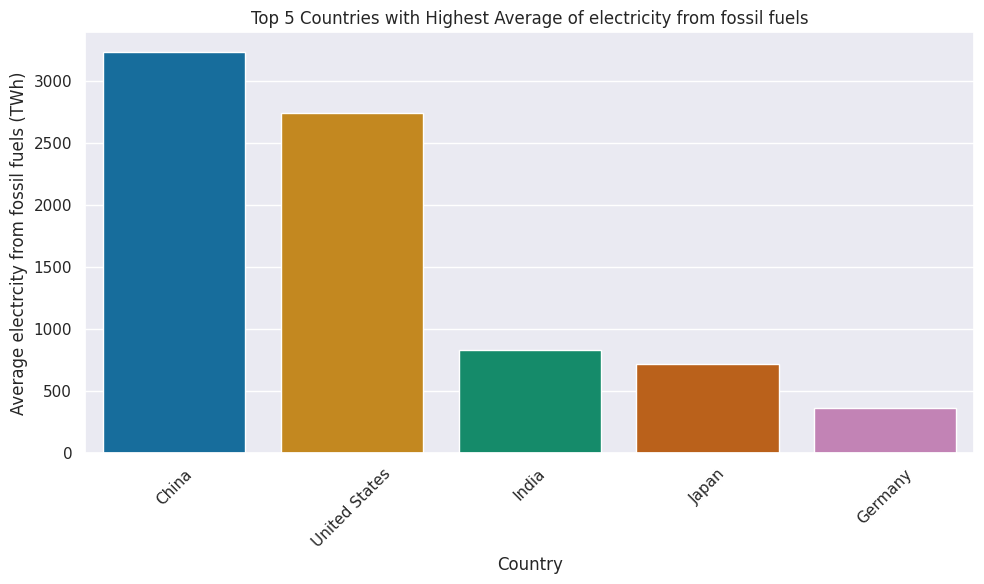

In [85]:
plt.figure(figsize = (10, 6))
sns.barplot(x = top_5_countries.index, y = top_5_countries.values)
plt.xlabel('Country')
plt.ylabel('Average electrcity from fossil fuels (TWh)')
plt.title('Top 5 Countries with Highest Average of electricity from fossil fuels')

plt.xticks(rotation = 45, ha = 'center')

plt.tight_layout()
plt.show()

In [87]:
average_electricity_from_renewables_by_country = df.groupby('Country')['Electricity from renewables (TWh)'].mean()
top_5_countries = average_electricity_from_renewables_by_country.nlargest(5)

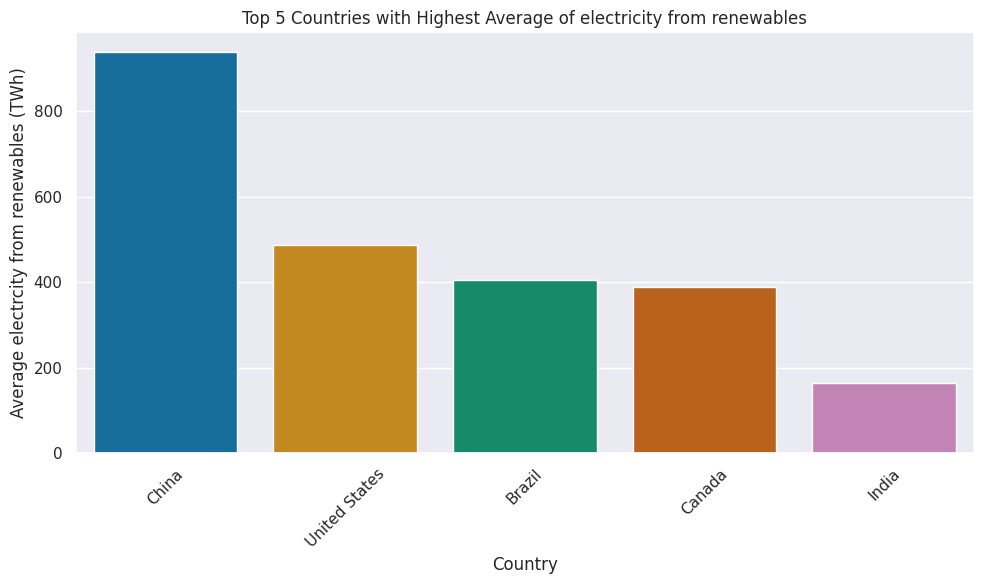

In [89]:
plt.figure(figsize = (10, 6))
sns.barplot(x = top_5_countries.index, y = top_5_countries.values)
plt.xlabel('Country')
plt.ylabel('Average electrcity from renewables (TWh)')
plt.title('Top 5 Countries with Highest Average of electricity from renewables')

plt.xticks(rotation = 45, ha = 'center')

plt.tight_layout()
plt.show()

**3.1 Visualising CO2 emissions in respective countries**

**3.1.1 Five countries with the most CO2 Emissions**

In [90]:
average_co2_emission_by_country = df.groupby('Country')['CO2 emissions (kt)'].mean()
top_5_countries = average_co2_emission_by_country.nlargest(5)

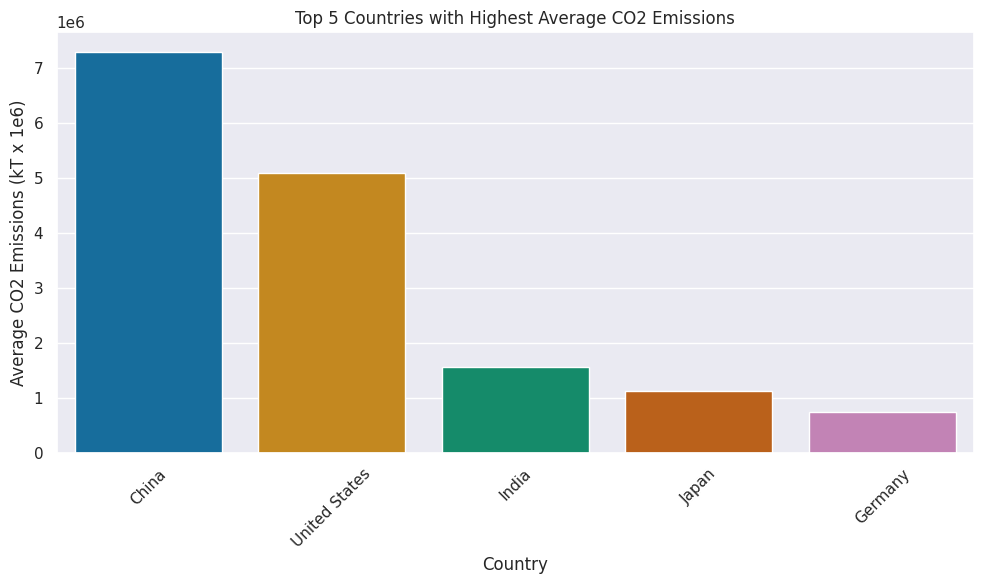

In [91]:
plt.figure(figsize = (10, 6))
sns.barplot(x = top_5_countries.index, y = top_5_countries.values)
plt.xlabel('Country')
plt.ylabel('Average CO2 Emissions (kT x 1e6)')
plt.title('Top 5 Countries with Highest Average CO2 Emissions')

plt.xticks(rotation = 45, ha = 'center')

plt.tight_layout()
plt.show()

**3.1.2 Five countries with the lowest CO2 emissions**

In [92]:
top_5_lowest_emissions = average_co2_emission_by_country.nsmallest(5)

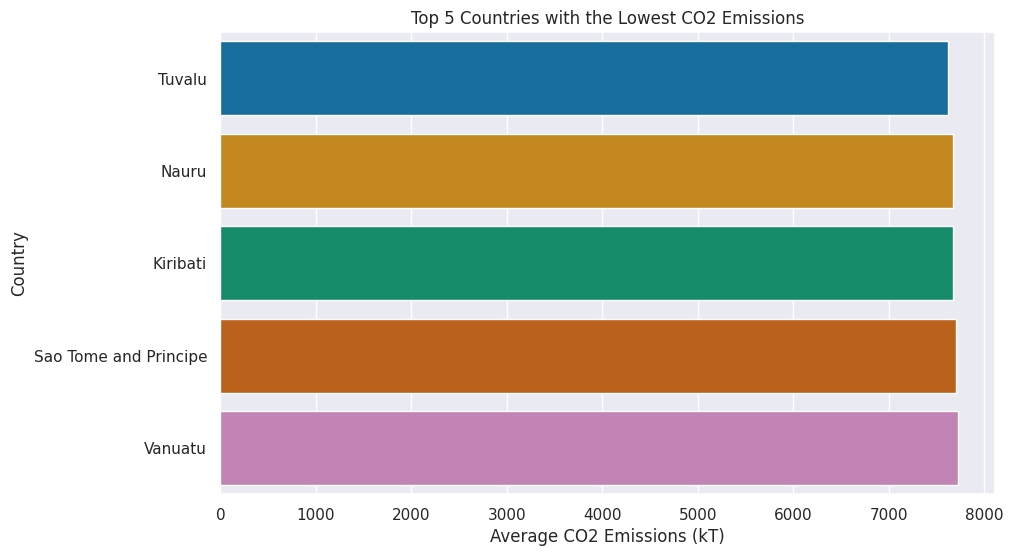

In [93]:
plt.figure(figsize = (10, 6))
sns.barplot(x = top_5_lowest_emissions.values, y = top_5_lowest_emissions.index)
plt.xlabel('Average CO2 Emissions (kT)')
plt.ylabel('Country')
plt.title('Top 5 Countries with the Lowest CO2 Emissions')

plt.show()

**3.1.3 Average growth of CO2 emission over the years**

In [95]:
average_co2_by_year = df.groupby('Year')['CO2 emissions (kt)'].mean()
average_co2_by_year = average_co2_by_year.reset_index()
average_co2_by_year.head()

,Year,CO2 emissions (kt)
0,2000,127621.444260
1,2001,129493.017635
2,2002,131131.063415
3,2003,137023.054880
4,2004,143124.773355


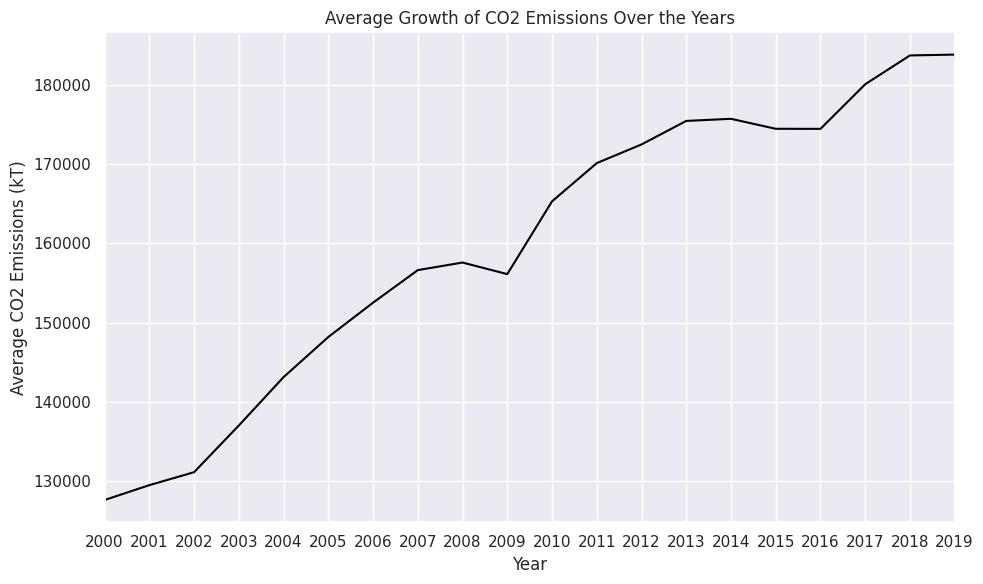

In [ ]:
plt.figure(figsize = (10, 6))
sns.lineplot(data = average_co2_by_year, x = 'Year', y = 'CO2 emissions (kt)', color = 'black')
plt.title('Average Growth of CO2 Emissions Over the Years')
plt.xlabel('Year')
plt.ylabel('Average CO2 Emissions (kT)')

plt.xticks(average_co2_by_year['Year'], rotation = 0, ha = 'center')
plt.xlim(2000, 2019) #2020 doesn't containt data and will be predicted later

plt.tight_layout()
plt.show()

**3.1.3.1 Growth of CO2 emissions in countries with highest and lowest values compared to the average growth**

In [96]:
china_data = df[df['Country'] == 'China']
tuvalu_data = df[df['Country'] == 'Tuvalu']

**3.1.3.1.1.  Highest Emission Country vs. World's Average**

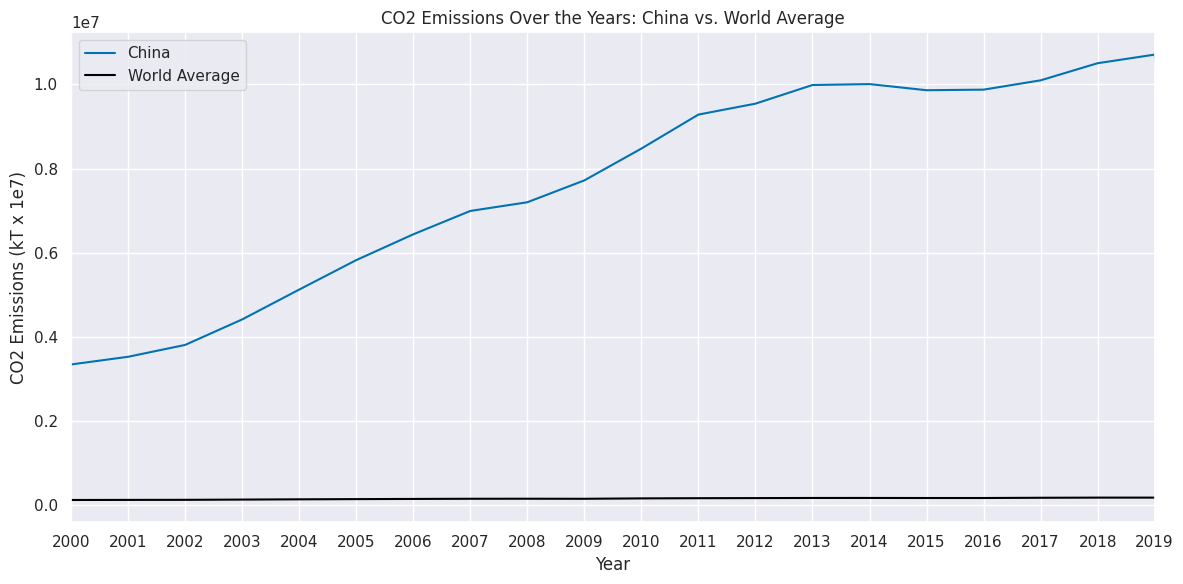

In [97]:
plt.figure(figsize = (12, 6))
sns.lineplot(data = china_data, x = 'Year', y = 'CO2 emissions (kt)', label = 'China')
sns.lineplot(data = average_co2_by_year, x = 'Year', y = 'CO2 emissions (kt)', label = 'World Average', color = 'black')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kT x 1e7)')
plt.title('CO2 Emissions Over the Years: China vs. World Average')

plt.xticks(average_co2_by_year['Year'], rotation = 0, ha = 'center')
plt.xlim(2000, 2019)

plt.tight_layout()
plt.show()

**3.1.3.1.2.  Lowest Emission Country vs. World's Average**

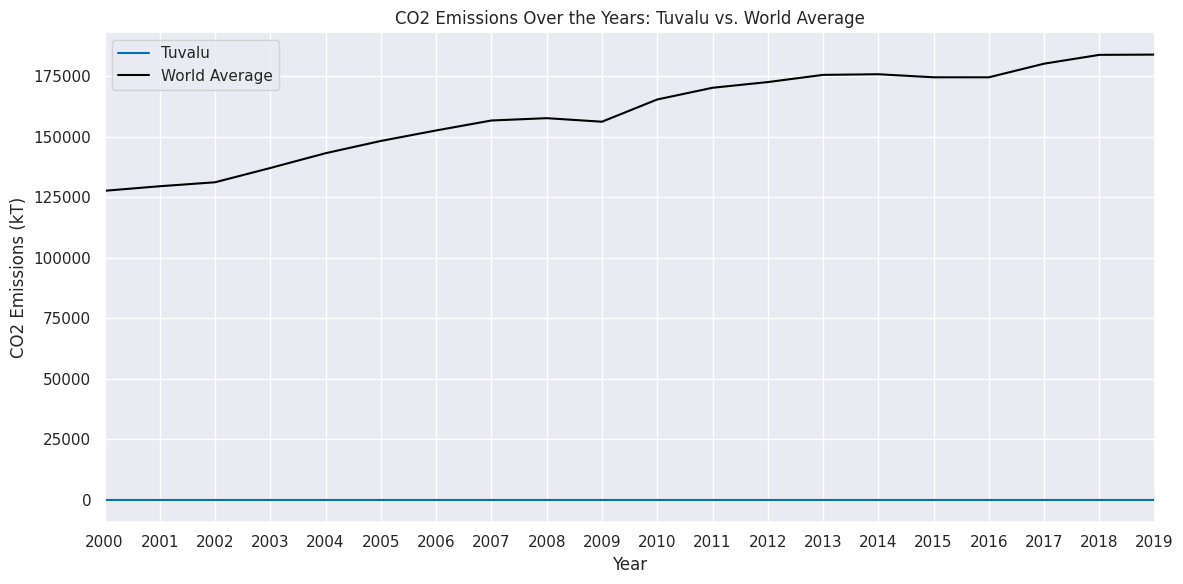

In [98]:
plt.figure(figsize = (12, 6))
sns.lineplot(data = tuvalu_data, x = 'Year', y = 'CO2 emissions (kt)', label = 'Tuvalu')
sns.lineplot(data = average_co2_by_year, x = 'Year', y = 'CO2 emissions (kt)', label = 'World Average', color = 'black')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kT)')
plt.title('CO2 Emissions Over the Years: Tuvalu vs. World Average')

plt.xticks(average_co2_by_year['Year'], rotation = 0, ha = 'center')
plt.xlim(2000, 2019)

plt.tight_layout()
plt.show()

**3.2 Showcasing correlations between data embedded in the dataset**

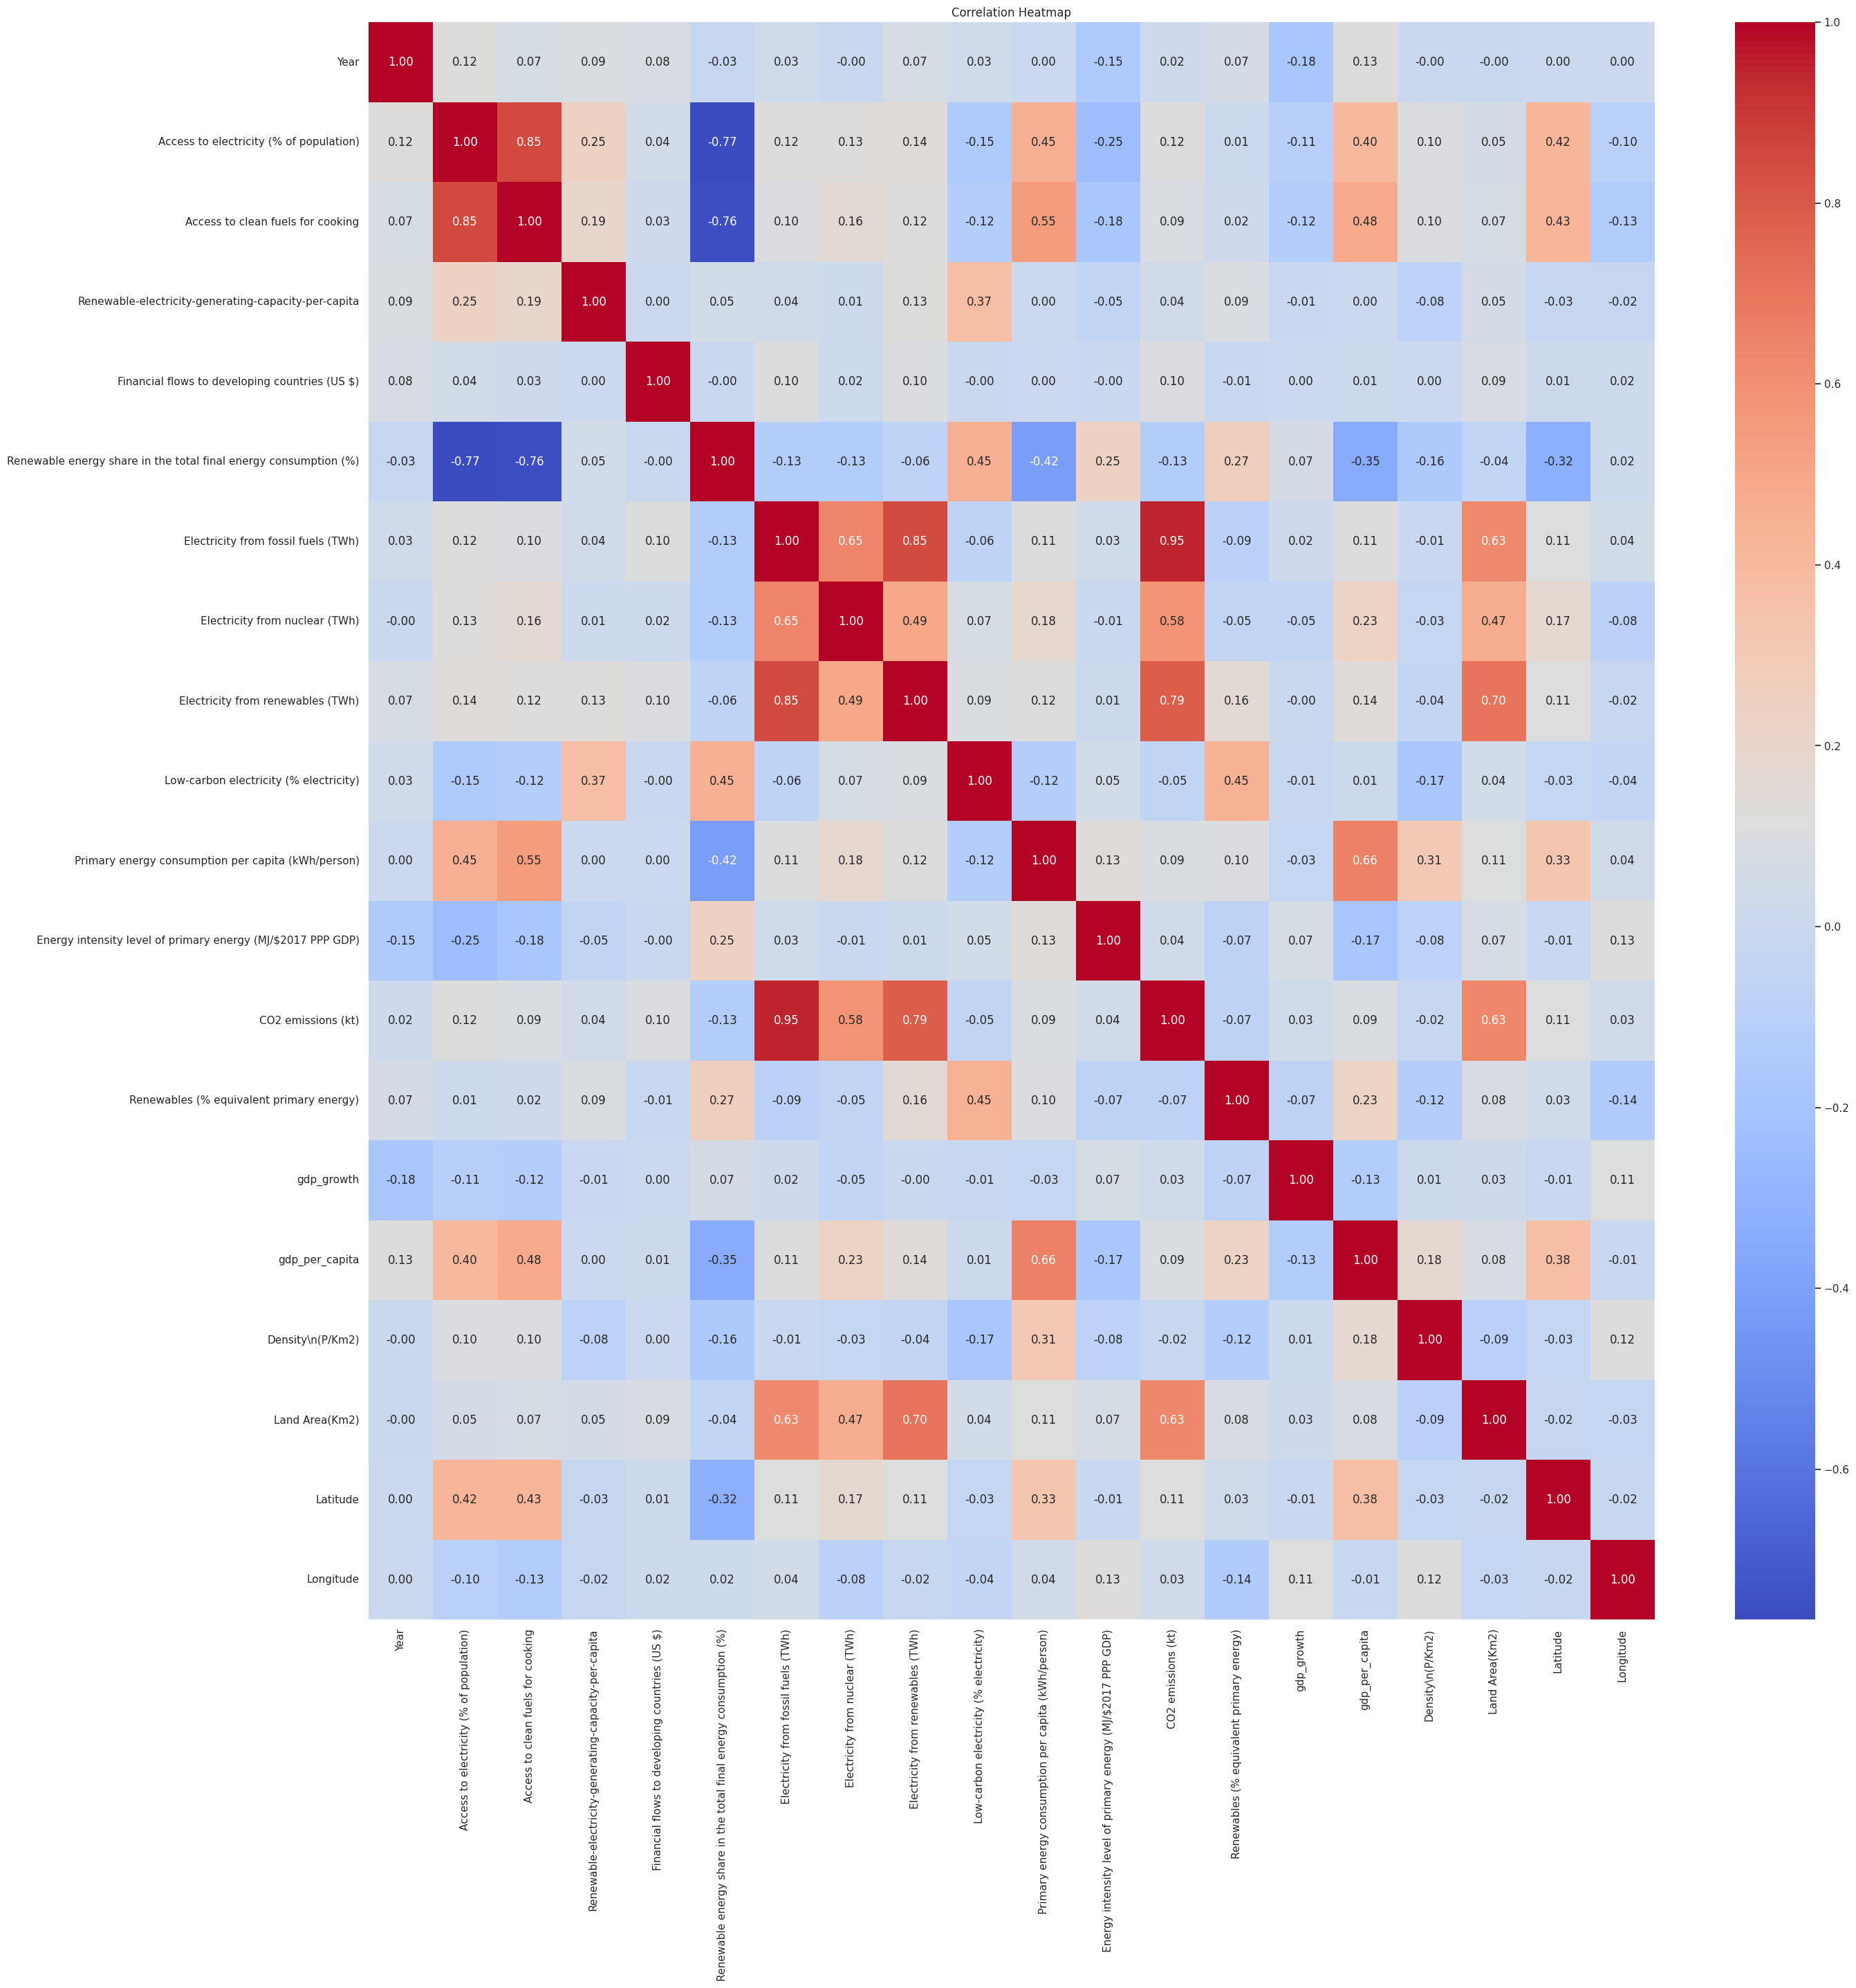

In [99]:
correlation_matrix = df.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**3.2.1 Top 5 Positive Correlations with the Target Variable**

In [103]:
print('Top 5 Most Positively Correlated to the Target Variable')
correlation_matrix['CO2 emissions (kt)'].sort_values(ascending=False).head(5)

Top 5 Most Positively Correlated to the Target Variable


CO2 emissions (kt)                     1.000000
Electricity from fossil fuels (TWh)    0.948809
Electricity from renewables (TWh)      0.786492
Land Area(Km2)                         0.633359
Electricity from nuclear (TWh)         0.582779
Name: CO2 emissions (kt), dtype: float64

**3.2.2 Top 5 Negative Correlations with the Target Variable**

In [104]:
print('Top 5 Most Negatively Correlated to the Target Variable')
correlation_matrix['CO2 emissions (kt)'].sort_values(ascending=True).head(5)

Top 5 Most Negatively Correlated to the Target Variable


Renewable energy share in the total final energy consumption (%)   -0.128787
Renewables (% equivalent primary energy)                           -0.070021
Low-carbon electricity (% electricity)                             -0.051162
Density\n(P/Km2)                                                   -0.018169
Year                                                                0.022100
Name: CO2 emissions (kt), dtype: float64

**3.2.3 Drop the columns that have a correlation value less than 0.5**

In [105]:
columns_to_drop = [col for col in correlation_matrix.columns if abs(correlation_matrix.loc['CO2 emissions (kt)', col]) < 0.5]
columns_to_drop

['Year',
 'Access to electricity (% of population)',
 'Access to clean fuels for cooking',
 'Renewable-electricity-generating-capacity-per-capita',
 'Financial flows to developing countries (US $)',
 'Renewable energy share in the total final energy consumption (%)',
 'Low-carbon electricity (% electricity)',
 'Primary energy consumption per capita (kWh/person)',
 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
 'Renewables (% equivalent primary energy)',
 'gdp_growth',
 'gdp_per_capita',
 'Density\\n(P/Km2)',
 'Latitude',
 'Longitude']

**3.2.4 Drop columns that have Null values**

In [106]:
df = df.drop(columns_to_drop, axis=1)

In [107]:
df.dropna()

,Country,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),CO2 emissions (kt),Land Area(Km2)
0,Afghanistan,0.160000,0.00000,0.31000,7.600000e+02,652230
1,Afghanistan,0.090000,0.00000,0.50000,7.300000e+02,652230
2,Afghanistan,0.130000,0.00000,0.56000,1.030000e+03,652230
3,Afghanistan,0.310000,0.00000,0.63000,1.220000e+03,652230
4,Afghanistan,0.330000,0.00000,0.56000,1.030000e+03,652230
5,Afghanistan,0.340000,0.00000,0.59000,1.550000e+03,652230
6,Afghanistan,0.200000,0.00000,0.64000,1.760000e+03,652230
7,Afghanistan,0.200000,0.00000,0.75000,1.770000e+03,652230
8,Afghanistan,0.190000,0.00000,0.54000,3.560000e+03,652230
9,Afghanistan,0.160000,0.00000,0.78000,4.880000e+03,652230


In [108]:
df.shape

(3649, 6)

**Impact of Fossil Fuels on CO2 emissions**

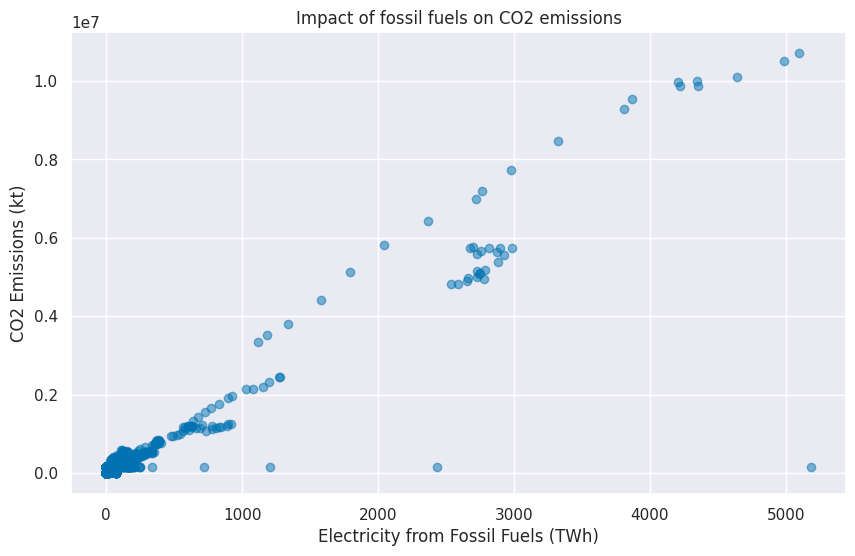

In [109]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Electricity from fossil fuels (TWh)'], df['CO2 emissions (kt)'], alpha=0.5, color='b')

# Add labels and title
plt.xlabel('Electricity from Fossil Fuels (TWh)')
plt.ylabel('CO2 Emissions (kt)')
plt.title('Impact of fossil fuels on CO2 emissions')

# Display the plot
plt.grid(True)
plt.show()


**Impact of Nuclear energy on CO2 emissions**

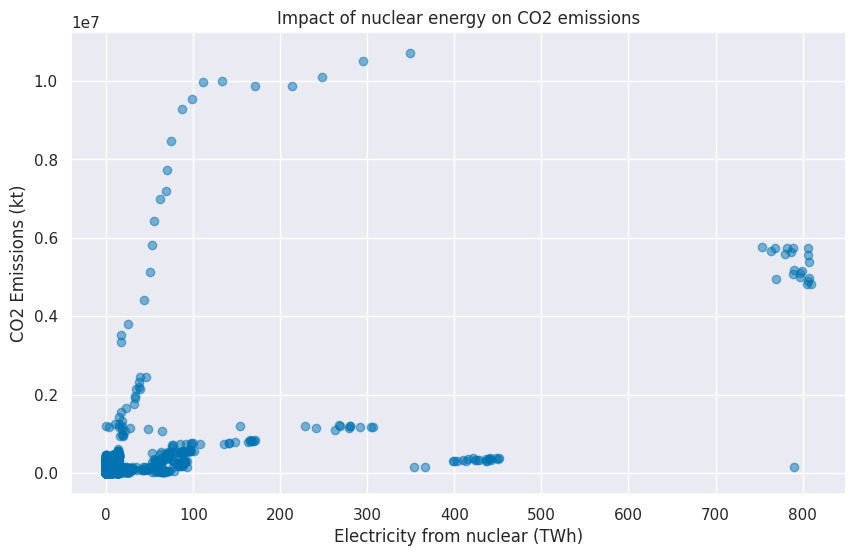

In [110]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Electricity from nuclear (TWh)'], df['CO2 emissions (kt)'], alpha=0.5, color='b')

# Add labels and title
plt.xlabel('Electricity from nuclear (TWh)')
plt.ylabel('CO2 Emissions (kt)')
plt.title('Impact of nuclear energy on CO2 emissions')

# Display the plot
plt.grid(True)
plt.show()

**Impact of Renewable energies on CO2 emissions**

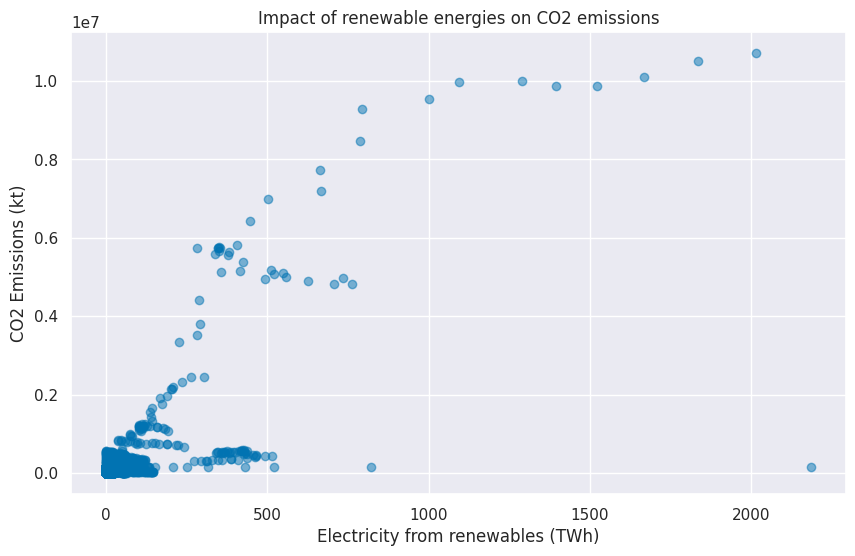

In [112]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Electricity from renewables (TWh)'], df['CO2 emissions (kt)'], alpha=0.5, color='b')

# Add labels and title
plt.xlabel('Electricity from renewables (TWh)')
plt.ylabel('CO2 Emissions (kt)')
plt.title('Impact of renewable energies on CO2 emissions')

# Display the plot
plt.grid(True)
plt.show()

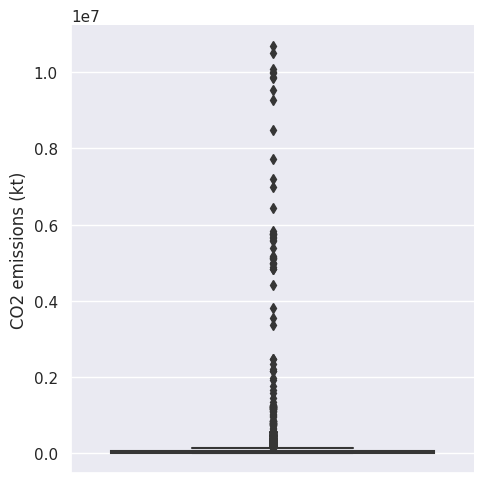

In [ ]:
sns.catplot(data=df, y="CO2 emissions (kt)",  kind="box")

**Impact of Land Area on CO2 emissions**

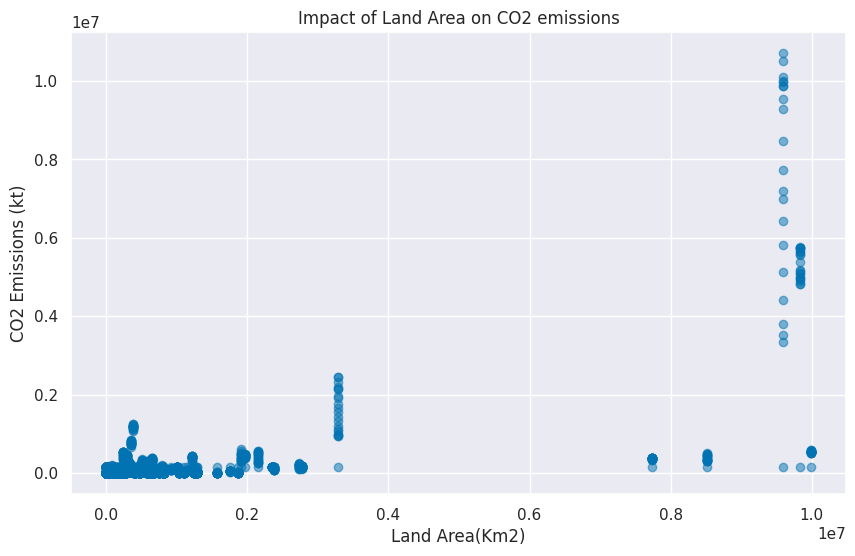

In [114]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Land Area(Km2)'], df['CO2 emissions (kt)'], alpha=0.5, color='b')

# Add labels and title
plt.xlabel('Land Area(Km2)')
plt.ylabel('CO2 Emissions (kt)')
plt.title('Impact of Land Area on CO2 emissions')

# Display the plot
plt.grid(True)
plt.show()

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3649 non-null   object 
 1   Electricity from fossil fuels (TWh)  3649 non-null   float64
 2   Electricity from nuclear (TWh)       3649 non-null   float64
 3   Electricity from renewables (TWh)    3649 non-null   float64
 4   CO2 emissions (kt)                   3649 non-null   float64
 5   Land Area(Km2)                       3649 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 171.2+ KB


**Predicting Global Energy Consumption Trends**

**Importing Libraries**

In [117]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Country = le.fit_transform(df.Country)

In [121]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

**CO2 emission values**

In [118]:
X = df.drop(columns=['CO2 emissions (kt)'])
y = df['CO2 emissions (kt)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2919, 5)
X_test shape: (730, 5)
y_train shape: (2919,)
y_test shape: (730,)


In [119]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1406 to 1791
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              730 non-null    int64  
 1   Electricity from fossil fuels (TWh)  730 non-null    float64
 2   Electricity from nuclear (TWh)       730 non-null    float64
 3   Electricity from renewables (TWh)    730 non-null    float64
 4   Land Area(Km2)                       730 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 34.2 KB


In [123]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
}
best_model = None
best_r2 = 0

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test)

# Evaluate the model
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    submit = pd.DataFrame()
    submit['Actual CO2 emissions'] = y_test
    submit['Predict_CO2 emissions'] = y_pred
    submit = submit.reset_index()
    r2 = r2_score(y_test, y_pred)
    if r2 > best_r2:
        best_r2 = r2
        best_model = model.__class__.__name__

    print(f'{model_name}:')
    print(f'R2 Score: {r2:.2f}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
    print(submit.head(5))

print(f"The best performing model is: {best_model} with accuracy: {best_r2:.2f}")

Linear Regression:
R2 Score: 0.94
Mean Absolute Error (MAE): 61598.34
Root Mean Squared Error (RMSE): 125042.96
   index  Actual CO2 emissions  Predict_CO2 emissions
0   1406           3950.000048           24265.546090
1   3598         159866.462686           40394.842364
2   3646          12380.000110           18838.639612
3   3230           2150.000000          -11373.264554
4   3114         274399.993900          200297.606990
Random Forest:
R2 Score: 0.99
Mean Absolute Error (MAE): 15067.12
Root Mean Squared Error (RMSE): 41274.98
   index  Actual CO2 emissions  Predict_CO2 emissions
0   1406           3950.000048           22494.589767
1   3598         159866.462686          159866.462686
2   3646          12380.000110           14290.229225
3   3230           2150.000000            5887.529277
4   3114         274399.993900          289177.330236
Gradient Boosting:
R2 Score: 0.99
Mean Absolute Error (MAE): 25519.62
Root Mean Squared Error (RMSE): 49827.84
   index  Actual CO2 e

Electricity from fossil fuels (TWh): 0.87
Electricity from nuclear (TWh): 0.09
Electricity from renewables (TWh): 0.03
Land Area(Km2): 0.01
Country: 0.00


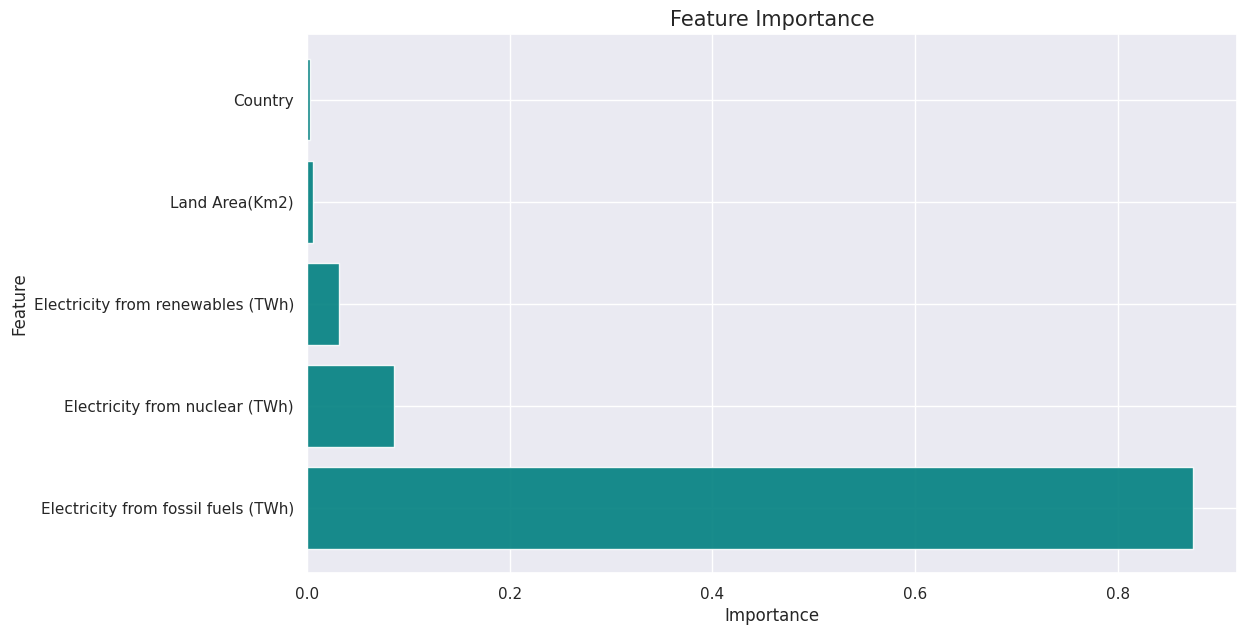

In [ ]:
importances = model.feature_importances_

feature_names = X.columns

feature_importance_dict = dict(zip(feature_names, importances))

sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance:.2f}")

plt.figure(figsize=(12, 7))
plt.barh(*zip(*sorted_feature_importance), alpha=0.9, color='teal')
plt.title('Feature Importance', fontsize=15)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

**Forward Selection**

In [ ]:
import statsmodels.api as sm

X = df.drop(columns=['CO2 emissions (kt)'])
y = df['CO2 emissions (kt)']

def forward_selection(df, target, significance_level=0.05):
    initial_features = df.columns.tolist()
    best_features = []
    while len(initial_features) > 0:
        remaining_features = list(set(initial_features) - set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(df[best_features + [new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if min_p_value < significance_level:
           best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

# Assuming you have already defined X and y as the features and target variable respectively
selected_features = forward_selection(X, y)
print("Selected features:", selected_features)

Selected features: ['Electricity from fossil fuels (TWh)', 'Land Area(Km2)', 'Electricity from renewables (TWh)', 'Electricity from nuclear (TWh)', 'Country']


**Electricity from fossil fuels (TWh)**

In [ ]:
X = df.drop(columns=['Electricity from fossil fuels (TWh)'])
y = df['Electricity from fossil fuels (TWh)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2919, 5)
X_test shape: (730, 5)
y_train shape: (2919,)
y_test shape: (730,)


In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
}
best_model = None
best_r2 = 0

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test)

    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    submit = pd.DataFrame()
    submit['Actual Electricity'] = y_test
    submit['Predict_Electricity'] = y_pred
    submit = submit.reset_index()
    r2 = r2_score(y_test, y_pred)
    if r2 > best_r2:
        best_r2 = r2
        best_model = model.__class__.__name__

    print(f'{model_name}:')
    print(f'R2 Score: {r2:.2f}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
    print(submit.head(5))

print(f"The best performing model is: {best_model} with accuracy: {best_r2:.2f}")

Linear Regression:
R2 Score: 0.93
Mean Absolute Error (MAE): 30.61
Root Mean Squared Error (RMSE): 67.96
   index  Actual Electricity  Predict_Electricity
0   1406                0.75            -2.485400
1   3598                6.65             7.021790
2   3646                3.73            16.686646
3   3230                0.17            25.312250
4   3114              146.12           223.144152
Random Forest:
R2 Score: 0.99
Mean Absolute Error (MAE): 4.36
Root Mean Squared Error (RMSE): 22.40
   index  Actual Electricity  Predict_Electricity
0   1406                0.75             0.893500
1   3598                6.65             4.580455
2   3646                3.73             3.914800
3   3230                0.17             0.202600
4   3114              146.12           134.354100
Gradient Boosting:
R2 Score: 0.99
Mean Absolute Error (MAE): 8.28
Root Mean Squared Error (RMSE): 22.05
   index  Actual Electricity  Predict_Electricity
0   1406                0.75             

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving global-data-on-sustainable-energy.csv to global-data-on-sustainable-energy (1).csv


In [ ]:
df= pd.read_csv('global-data-on-sustainable-energy.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as smapi
import warnings

warnings.filterwarnings("ignore")

# Assuming you have a DataFrame 'data' with a 'Year' column and 'CO2 emissions (kt)' data
# You may need to import your data first

# Filter data for the years 2000 to 2019 (your historical data)
historical_data = df[df['Year'] < 2020]

# Fit an ARIMA model to the historical data
model = ARIMA(historical_data['Value_co2_emissions_kt_by_country'], order=(5,1,0))  # You can tune the order
fitted = model.fit()
# Make a forecast for 2020
forecast = model.fit(steps=1)  # Forecast for one year ahead

# Print the forecast
print(f"CO2 emissions forecast for 2020: {forecast.values[0]:.2f} kt")

# Visualize the historical data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(historical_data['Year'], historical_data['CO2 emissions (kt)'], label='Historical Data')
plt.plot(2020, forecast.values[0], 'ro', label='2020 Forecast')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')
plt.title('CO2 Emissions Forecast for 2020')
plt.legend()
plt.grid(True)
plt.show()


TypeError: ignored

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
def plot_map(df, column, title):
    """
    Create an animated choropleth map with specified data and parameters.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        column (str): The name of the column to be used as the color metric.
        title (str): The title of the choropleth map.

    Returns:
        fig: The Plotly figure object representing the choropleth map.
    """

    # Create a choropleth map using Plotly Express
    fig = px.choropleth(
        df,
        locations = 'Entity',
        locationmode = 'country names',
        color = column,
        hover_name = 'Entity',
          color_continuous_scale = 'RdYlGn',
        animation_frame = 'Year',
        range_color = [0, 100])

    # Update geographic features
    fig.update_geos(
        showcoastlines = True,
        coastlinecolor = "Black",
        showland = True,
        landcolor = "white",
        showcountries = True,
        showocean = True,
        oceancolor = "LightBlue")

    # Update the layout of the figure
    fig.update_layout(
        title_text = title,
        geo = dict(
             showframe = False,
            showcoastlines = False,
            projection_type = 'equirectangular',
            showland = True,
            landcolor = "white",
            showcountries = True,
            showocean = True,
            oceancolor = "LightBlue"),
        width = 1000,
        height = 850,
        dragmode = 'pan',
        hovermode = 'closest',
        coloraxis_colorbar = dict(
            title = column,
            title_font_size = 14,
            title_side = 'right',
            lenmode = 'pixels',
            len = 300,
            thicknessmode = 'pixels',
              thickness = 15),
        updatemenus = [
            {"type": "buttons", "showactive": False, "x": 0.1, "y": 0.9, "buttons": [{"label": "Play", "method": "animate"}]},
            {"type": "buttons", "showactive": False, "x": 0.18, "y": 0.9, "buttons": [{"label": "Pause", "method": "animate"}]},
            {"type": "buttons", "showactive": False, "x": 0.26, "y": 0.9, "buttons": [{"label": "Stop", "method": "animate"}]}],
        sliders = [{"yanchor": "top", "xanchor": "left", "currentvalue": {"font": {"size": 20}}, "steps": []}])

    # Create slider steps for animation
    slider_steps = []

    for year in df['Year'].unique():
        step = {
            "args": [
                [year],
                 {"frame": {"duration": 300, "redraw": False}, "mode": "immediate", "transition": {"duration": 0}}],
            "label": str(year),
            "method": "animate"}
        slider_steps.append(step)

    # Assign slider steps to the figure layout
    fig.layout.updatemenus[0].buttons[0].args[1]['steps'] = slider_steps

    return fig

In [ ]:
df_subset = df[['Electricity from renewables (TWh)', 'Electricity from fossil fuels (TWh)']]

In [ ]:
plot_map(df_subset,'Electricity from renewables (TWh)', 'Electricity from fossil fuels (TWh)')

ValueError: ignored

**Map Shape Function**

In [ ]:
# Function to plot features on world map
def plot_world_map(column_name):
    fig = go.Figure()
    for year in range(2000, 2021):
        # Filter the data for the current year
        filtered_df = df[df['Year'] == year]

        # Create a choropleth trace for the current year
        trace = go.Choropleth(
            locations=filtered_df['Country'],
            z=filtered_df[column_name],
            locationmode='Country names',
            colorscale='Electric',  # Use a different color scale for better contrast
            colorbar=dict(title=column_name),
            zmin=df[column_name].min(),
            zmax=df[column_name].max(),
            visible=False  # Set the trace to invisible initially
        )
           # Add the trace to the figure
        fig.add_trace(trace)

    # Set the first trace to visible
    fig.data[0].visible = True

    # Create animation steps
    steps = []
    for i in range(len(fig.data)):
        step = dict(
            method='update',
            args=[{'visible': [False] * len(fig.data)},  # Set all traces to invisible
                  {'title_text': f'{column_name} Map - {2000 + i}', 'frame': {'duration': 1000, 'redraw': True}}],
            label=str(2000 + i)  # Set the label for each step
        )
        step['args'][0]['visible'][i] = True  # Set the current trace to visible
        steps.append(step)

         # Create the slider
    sliders = [dict(
        active=0,
        steps=steps,
        currentvalue={"prefix": "Year: ", "font": {"size": 14}},  # Increase font size for slider label
    )]

    # Update the layout of the figure with increased size and change the template
    fig.update_layout(
        title_text=f'{column_name} Map with slider',  # Set the initial title
        title_font_size=24,  # Increase title font size
        title_x=0.5,  # Center the title
        geo=dict(
            showframe=True,
            showcoastlines=False,
            projection_type='natural earth'
              ),
        sliders=sliders,
        height=500,  # Set the height of the figure in pixels
        width=1000,  # Set the width of the figure in pixels
        font=dict(family='Arial', size=12),  # Customize font family and size for the whole figure
        margin=dict(t=80, l=50, r=50, b=50),  # Add margin for better layout spacing
        # Change the template to 'plotly_dark'
    )

    # Show the figure
    fig.show()


In [ ]:
select_col=df.columns
select_col = ['CO2 emissions (kt)',
 'Electricity from fossil fuels (TWh)']

In [ ]:
for i in select_col:
    column_name = i
    print(column_name)
    plot_world_map(column_name)

CO2 emissions (kt)


KeyError: ignored

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd drive/My\ Drive/

/content/drive/My Drive


In [5]:
%cd Colab\ Notebooks

/content/drive/My Drive/Colab Notebooks


In [11]:
!pip install LaTeX

In [12]:
!sudo apt-get install texlive-full

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-full is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


In [10]:
!pwd

/content/drive/MyDrive/Colab Notebooks


In [13]:
!jupyter nbconvert --to pdf Global\ CO2\ Emissions.ipynb

[NbConvertApp] Converting notebook Global CO2 Emissions.ipynb to pdf
[NbConvertApp] Support files will be in Global CO2 Emissions_files/
[NbConvertApp] Making directory ./Global CO2 Emissions_files
[NbConvertApp] Making directory ./Global CO2 Emissions_files
[NbConvertApp] Making directory ./Global CO2 Emissions_files
[NbConvertApp] Making directory ./Global CO2 Emissions_files
[NbConvertApp] Making directory ./Global CO2 Emissions_files
[NbConvertApp] Making directory ./Global CO2 Emissions_files
[NbConvertApp] Making directory ./Global CO2 Emissions_files
[NbConvertApp] Making directory ./Global CO2 Emissions_files
[NbConvertApp] Making directory ./Global CO2 Emissions_files
[NbConvertApp] Making directory ./Global CO2 Emissions_files
[NbConvertApp] Making directory ./Global CO2 Emissions_files
[NbConvertApp] Making directory ./Global CO2 Emissions_files
[NbConvertApp] Making directory ./Global CO2 Emissions_files
[NbConvertApp] Making directory ./Global CO2 Emissions_files
[NbConver

In [14]:
pip install jupyterlab-miami-nights

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.0/347.0 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.9/377.9 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.9/105.9 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 8.0 MB/s eta 0:00:00
  Attempting uninstall: pyzmq
    Found existing installation: pyzmq 23.2.1
    Uninstalling pyzmq-23.2.1:
      Successfully uninstalled pyzmq-23.2.1
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-clien

In [15]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pandoc is already the newest version (2.9.2.1-3ubuntu2).
pandoc set to manually installed.
texlive-latex-extra is already the newest version (2021.20220204-1).
texlive-latex-extra set to manually installed.
texlive-xetex is already the newest version (2021.20220204-1).
texlive-xetex set to manually installed.
The following NEW packages will be installed:
  texlive
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 14.3 kB of archives.
After this operation, 73.7 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 texlive all 2021.20220204-1 [14.3 kB]
Fetched 14.3 kB in 0s (181 kB/s)
Selecting previously unselected package texlive.
(Reading database ... 341843 files and directories currently installed.)
Preparing to unpack .../texlive_2021.20220204-1_all.deb ...
Unpacking texlive (2021.20220204-1) ...
Setting up texliv